<a href="https://colab.research.google.com/github/SushantMuneshwar/Store_Time_Series_Analysis/blob/main/Store_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a (Blog - Prophet VS ARIMA)

In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import os

In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Shipment.csv to Shipment.csv


In [7]:
import io

In [8]:
df = pd.read_csv(io.BytesIO(uploaded['Shipment.csv']))
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2015-115812,09-06-2015,14-06-2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [9]:
import matplotlib.pyplot as plt

In [10]:
sale_pro= df[['Order Date', 'Sales']]
sale_pro

,Order Date,Sales
0,08-11-2017,261.9600
1,08-11-2017,731.9400
2,12-06-2017,14.6200
3,11-10-2016,957.5775
4,11-10-2016,22.3680
...,...,...
9795,21-05-2017,3.7980
9796,12-01-2016,10.3680
9797,12-01-2016,235.1880
9798,12-01-2016,26.3760


In [11]:
sale_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  9800 non-null   object 
 1   Sales       9800 non-null   float64
dtypes: float64(1), object(1)
memory usage: 153.2+ KB


In [12]:
# converting order date to date time
df['Order Date']= pd.to_datetime(df['Order Date'])

In [13]:
# creating month and year
# strftime -> Converts date into strings

df['Year Month'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [14]:
# Grouping month and year wrt sales
# value error - reseting the indexes

trend = pd.DataFrame(df.groupby('Year Month').sum()['Sales'].reset_index())
trend

,Year Month,Sales
0,2015-01,28828.2540
1,2015-02,12588.4840
2,2015-03,54027.6920
3,2015-04,24710.0160
4,2015-05,29520.4900
5,2015-06,29181.3346
6,2015-07,35194.5580
7,2015-08,37349.2655
8,2015-09,65956.3998
9,2015-10,34561.9470


<function matplotlib.pyplot.show(*args, **kw)>

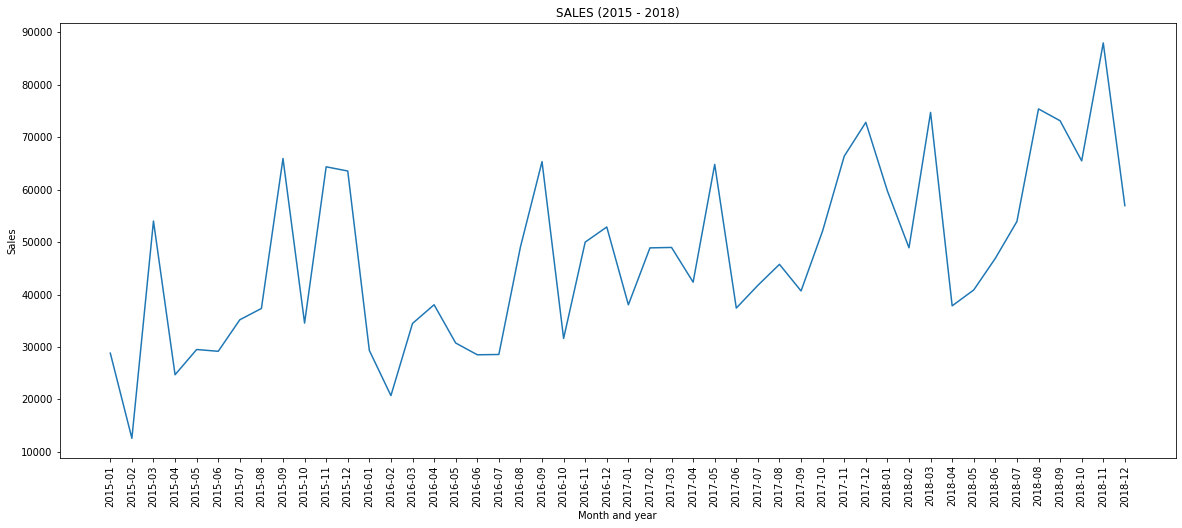

In [15]:
plt.figure(figsize=(20,8))
plt.plot(trend['Year Month'], trend['Sales'])
plt.xticks(rotation = 'vertical', size =10)
plt.title('SALES (2015 - 2018)')
plt.ylabel('Sales')
plt.xlabel('Month and year')
plt.show

In [16]:
#https://www.geeksforgeeks.org/python-datetime-strptime-function/
#strptime -> method available in DateTime which is used to format the time stamp which is in string format to date-time object

from datetime import datetime
datepar = lambda x: datetime.strptime(x, '%Y/%m/%d')


In [17]:
# Renaming order as ds and
sale_pro  = sale_pro.rename(columns = {'Order Date': 'ds','Sales': 'y'})
sale_pro

,ds,y
0,08-11-2017,261.9600
1,08-11-2017,731.9400
2,12-06-2017,14.6200
3,11-10-2016,957.5775
4,11-10-2016,22.3680
...,...,...
9795,21-05-2017,3.7980
9796,12-01-2016,10.3680
9797,12-01-2016,235.1880
9798,12-01-2016,26.3760


training model

In [18]:
#m = Prophet(interval_width=0.95, daily_seasonality=True)
#model = m.fit(sale_pro)   # training data without splitting

**Splitting data into training and testing**

In [19]:
train = sale_pro.iloc[:len(sale_pro)-365]
test = sale_pro.iloc[len(sale_pro)-365:]

In [20]:
train

,ds,y
0,08-11-2017,261.9600
1,08-11-2017,731.9400
2,12-06-2017,14.6200
3,11-10-2016,957.5775
4,11-10-2016,22.3680
...,...,...
9430,28-08-2016,103.4810
9431,19-06-2016,5.9040
9432,17-08-2016,30.0800
9433,17-08-2016,36.2880


In [21]:
# forcating for year 2019
# Creating future prediction for 365 days -> period
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365,freq='D') # freq -> MS for monthly, H for Hourly, By defult it is daily
forecast = m.predict(future) 

# It could not detect the daily seasonality

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyibnv8zg/q5knnz4w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyibnv8zg/d3vi5gsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10633', 'data', 'file=/tmp/tmpyibnv8zg/q5knnz4w.json', 'init=/tmp/tmpyibnv8zg/d3vi5gsd.json', 'output', 'file=/tmp/tmpyibnv8zg/prophet_model3k_fphjc/prophet_model-20221126102639.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,226.803612,-519.226987,1099.471694,226.803612,226.803612,41.752548,41.752548,41.752548,4.270992,4.270992,4.270992,37.481556,37.481556,37.481556,0.0,0.0,0.0,268.556160
1,2015-01-03,226.886255,-550.244362,1027.436391,226.886255,226.886255,56.907096,56.907096,56.907096,20.476512,20.476512,20.476512,36.430585,36.430585,36.430585,0.0,0.0,0.0,283.793351
2,2015-01-04,226.968897,-566.477019,1018.594309,226.968897,226.968897,6.881079,6.881079,6.881079,-28.120735,-28.120735,-28.120735,35.001815,35.001815,35.001815,0.0,0.0,0.0,233.849977
3,2015-01-06,227.134183,-595.320660,1083.383412,227.134183,227.134183,11.100217,11.100217,11.100217,-20.192583,-20.192583,-20.192583,31.292801,31.292801,31.292801,0.0,0.0,0.0,238.234400
4,2015-01-07,227.216825,-535.004862,1031.018827,227.216825,227.216825,43.491430,43.491430,43.491430,14.313080,14.313080,14.313080,29.178350,29.178350,29.178350,0.0,0.0,0.0,270.708256


In [23]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1579,2019-12-26,222.481657,-552.775038,1132.473859,207.609812,237.614019,44.457665,44.457665,44.457665,13.551611,13.551611,13.551611,30.906053,30.906053,30.906053,0.0,0.0,0.0,266.939322
1580,2019-12-27,222.477584,-531.927537,1115.812959,207.584252,237.674389,37.564119,37.564119,37.564119,4.270992,4.270992,4.270992,33.293128,33.293128,33.293128,0.0,0.0,0.0,260.041703
1581,2019-12-28,222.473512,-525.279171,1054.119958,207.513127,237.729877,55.726021,55.726021,55.726021,20.476512,20.476512,20.476512,35.249509,35.249509,35.249509,0.0,0.0,0.0,278.199533
1582,2019-12-29,222.469439,-628.083163,977.097055,207.414918,237.785366,8.614093,8.614093,8.614093,-28.120735,-28.120735,-28.120735,36.734828,36.734828,36.734828,0.0,0.0,0.0,231.083532
1583,2019-12-30,222.465366,-542.946420,1036.781511,207.333398,237.841671,33.424186,33.424186,33.424186,-4.298877,-4.298877,-4.298877,37.723063,37.723063,37.723063,0.0,0.0,0.0,255.889553


In [24]:
# This plot predicts the sales for the upcoming year i.e 2019.
# Visualisation package (model_name.plot) in prophet library
# Blue line -> predicted Value
# Black dots -> datapoints
# Light blue area -> Trend space
                 #Fore_plot = m.plot(forecast, xlabel='year', ylabel='Daily Sales')

# it is non-interactive in-build Prophet library for visualization for (Prediction of next 365 days)

### **Prediction Plot**

In [25]:
# This plot predicts the sales for the upcoming year i.e 2019 (Next 365 days)
# Visualisation package (plot_plotly) in prophet library

from prophet.plot import plot_plotly, plot_components_plotly  # (in-build visualization library for interactive sales)

plot_plotly (m, forecast)

In [26]:
#https://www.youtube.com/watch?v=95-HMzxsghY (YT- inrtro to facebook Prophet)

### **Ploting trend, Monthly and Weekly Plot**

In [27]:
# This plot shows the forecast components we can see the trend, yearly seasonality, and weekly seasonality of the time series
# Here we can see the prediction according to the 

#comp_plot = m.plot_components(forecast)

# it is non-interactive in-build Prophet library for visualization

In [28]:
from prophet.plot import plot_plotly, plot_components_plotly # (in-build visualization library for interactive sales)

In [29]:
plot_components_plotly (m, forecast)

In [30]:
#from statsmodels.tools.eval_measures import rmse (Evaluation)

In [31]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [32]:
#prediction = forecast.iloc[-365:]['yhat']
#prediction

In [33]:
#print ("Root mean Squared Error between Actual and Predicted values: ", rmse(prediction, test['y']))
#print ("Mean Value of Test Dataset:", test['y'].mean())

### **Profit Prediction**

In [34]:
profit_pr= df[['Order Date', 'Profit']]
profit_pr

,Order Date,Profit
0,2017-08-11,41.9136
1,2017-08-11,219.5820
2,2017-12-06,6.8714
3,2016-11-10,-383.0310
4,2016-11-10,2.5164
...,...,...
9795,2017-05-21,-5.8869
9796,2016-12-01,1.5552
9797,2016-12-01,-43.1178
9798,2016-12-01,2.6376


In [35]:
profit_pr  = profit_pr.rename(columns = {'Order Date': 'ds','Profit': 'y'})
profit_pr

,ds,y
0,2017-08-11,41.9136
1,2017-08-11,219.5820
2,2017-12-06,6.8714
3,2016-11-10,-383.0310
4,2016-11-10,2.5164
...,...,...
9795,2017-05-21,-5.8869
9796,2016-12-01,1.5552
9797,2016-12-01,-43.1178
9798,2016-12-01,2.6376


In [36]:
# month and year wise profit

prof_trend = pd.DataFrame(df.groupby('Year Month').sum()['Profit'].reset_index())
prof_trend

,Year Month,Profit
0,2015-01,4549.5870
1,2015-02,2621.3569
2,2015-03,175.2216
3,2015-04,4601.0714
4,2015-05,3854.2793
5,2015-06,4456.2974
6,2015-07,-1801.6721
7,2015-08,1987.4832
8,2015-09,10193.8066
9,2015-10,4075.1499


<function matplotlib.pyplot.show(*args, **kw)>

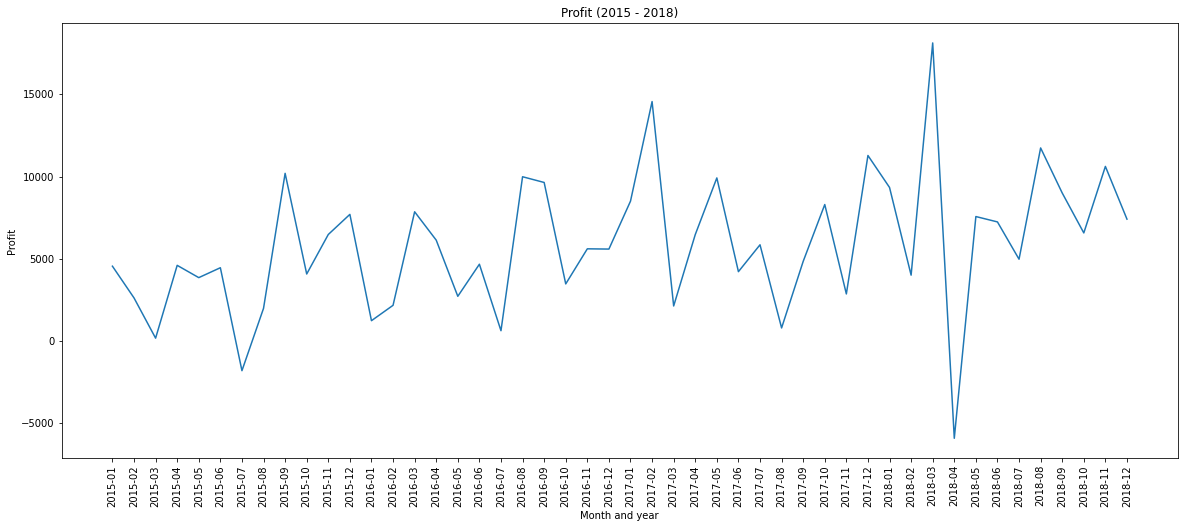

In [37]:
plt.figure(figsize=(20,8))
plt.plot(prof_trend['Year Month'], prof_trend['Profit'])
plt.xticks(rotation = 'vertical', size =10)
plt.title('Profit (2015 - 2018)')
plt.ylabel('Profit')
plt.xlabel('Month and year')
plt.show

**Train test split**

In [38]:
train1 = profit_pr.iloc[:len(profit_pr)-365]
test1 = profit_pr.iloc[len(profit_pr)-365:]

In [39]:
# forcating for year 2019
# Creating future prediction for 365 days -> period

mod = Prophet()
mod.fit(train1)
future = mod.make_future_dataframe(periods=365,freq='D') # freq -> MS for monthly, H for Hourly, By defult it is daily
forecast1 = mod.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyibnv8zg/42uj3mm4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyibnv8zg/txj762c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52437', 'data', 'file=/tmp/tmpyibnv8zg/42uj3mm4.json', 'init=/tmp/tmpyibnv8zg/txj762c_.json', 'output', 'file=/tmp/tmpyibnv8zg/prophet_model1zekh5ih/prophet_model-20221126102643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:26:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
plot_plotly (mod, forecast1)

In [41]:
plot_components_plotly (mod, forecast1)

In [42]:
#prof_prediction = forecast1.iloc[-365:]['yhat']
#prof_prediction

In [43]:
#print ("Root mean Squared Error between Actual and Predicted values: ", rmse(prof_prediction, test['y']))
#print ("Mean Value of Test Dataset:", test['y'].mean())